In [1]:
# import python libraries
import pandas as pd
import nbconvert
import matplotlib.pyplot as plt
import numpy as np
import scipy
import xlrd
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
import re, string, unicodedata
import os
import glob
import gensim
import nltk
#import contractions
import inflection as inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from string import ascii_lowercase
import itertools, snowballstemmer
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml.feature import Word2Vec
import spacy
#import basemap as basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
from geopy.geocoders import Nominatim
import math

C:\Users\yasser\Anaconda2\envs\pyt36\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
# 1.0  Import data into jupyterLab, create a pandas dataframe, perform data descriptive statistics

#1.1  import data and created pandas dataframe.
gender_input_df =  pd.read_csv("/twitter-gender.csv",encoding='latin-1',na_values=' ')


In [4]:
# 1.2  The count of columns and rows in the data to show total data size

gender_input_df.shape

(20050, 18)

In [6]:
gender_input_df.head(5)         # view first 5 rows and all columns

,_unit_id,gender,gender:confidence,created,description,fav_number,link_color,name,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,male,1.0000,12/05/13 01:48,i sing my own rhythm.,0,08C2C2,sheezy0,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,male,1.0000,10/01/12 13:51,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,äóìIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.590000e+17,NaN,Eastern Time (US & Canada)
2,815719228,male,0.6625,11/28/14 11:30,louis whining and squealing and all,7696,ABB8C2,lwtprettylaugh,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.590000e+17,clcncl,Belgrade
3,815719229,male,1.0000,06/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,douggarland,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,female,1.0000,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,WilfordGemma,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.590000e+17,NaN,NaN


In [7]:
''' Comment
There are 20050 rows and 18 columns which shows that all expected data were imported.
The profileimage column indicates a website link for pictutes or images. This will be dropped from the dataframe.
The images could be read to perform an image classification using machine learning or deep learning algorithm.
'''
go = 'go'

In [8]:
# 1.3 The different data types in the dataframe

gender_input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 18 columns):
_unit_id             20050 non-null int64
gender               19953 non-null object
gender:confidence    20024 non-null float64
created              20050 non-null object
description          16306 non-null object
fav_number           20050 non-null int64
link_color           20050 non-null object
name                 20050 non-null object
profileimage         20050 non-null object
retweet_count        20050 non-null int64
sidebar_color        20050 non-null object
text                 20050 non-null object
tweet_coord          159 non-null object
tweet_count          20050 non-null int64
tweet_created        20050 non-null object
tweet_id             20050 non-null float64
tweet_location       12559 non-null object
user_timezone        12252 non-null object
dtypes: float64(2), int64(4), object(12)
memory usage: 2.8+ MB


In [ ]:
''' Comment
The statistics shows 6 numerical variables indicated as int64 and float64 and 12 character variables or features.
'''

In [9]:
#1.4 Descriptive statistics of the numeric variables.

gender_input_df.describe()

,_unit_id,gender:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20024.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,0.882756,4382.201646,0.079401,3.892469e+04,6.590000e+17
std,6.000801e+03,0.191403,12518.575919,2.649751,1.168371e+05,0.000000e+00
min,8.157192e+08,0.000000,0.000000,0.000000,1.000000e+00,6.590000e+17
25%,8.157243e+08,0.677800,11.000000,0.000000,2.398000e+03,6.590000e+17
50%,8.157294e+08,1.000000,456.000000,0.000000,1.144150e+04,6.590000e+17
75%,8.157345e+08,1.000000,3315.500000,0.000000,4.002750e+04,6.590000e+17
max,8.157580e+08,1.000000,341621.000000,330.000000,2.680199e+06,6.590000e+17


In [10]:
'''
Comment
The variable 'Gender:confidence' contains 20024 real numbers  which is less then 20050 expected suggesting 26 NaN values
The maximum value of 'gender:confidence' is 1 and min is 0, mean is 0.882756 and SD is 0.191403.

The mean and standard deviation for 'fav_number' is very high suggesting the distribution could be skewed
between maximum value 341621 and minimum 0 depending on frequency of values. A histogram plot using values and log of 
values will show the distribution of values.

The 'retweet count' SD and mean are low, min is 0 and max is 330. Variable could be skewed, if lower value numbers are more
frequent.

The 'tweet count' range is 0 to 2.680199e+06 with high Standard deviation and mean, showing dominance of high numbers and skewed
distribution towards high values.

The 'tweet_id' and '_unit_id' will be compared for unique identification of the tweets and one will be dropped.
'''
go = 'go'

In [11]:
# To display description of all variables in the dataframe

gender_input_df.describe(include = 'all')

,_unit_id,gender,gender:confidence,created,description,fav_number,link_color,name,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
count,2.005000e+04,19953,20024.000000,20050,16306,20050.000000,20050,20050,20050,20050.000000,20050,20050,159,2.005000e+04,20050,2.005000e+04,12559,12252
unique,NaN,4,NaN,18699,15140,NaN,3001,18795,17164,NaN,561,18411,146,NaN,5,NaN,7863,156
top,NaN,female,NaN,8/24/15 14:19,"You can be spiritually empowered, financially ...",NaN,0084B4,TudoSobreQuase,https://abs.twimg.com/sticky/default_profile_i...,NaN,C0DEED,EVERYDAYILOVEYOU Forevermore\r\rand what makes...,"[32.6192856, -96.8494873]",NaN,10/26/15 12:40,NaN,London,Eastern Time (US & Canada)
freq,NaN,6700,NaN,30,33,NaN,9890,30,248,NaN,9093,193,2,NaN,8076,NaN,152,2496
mean,8.157294e+08,NaN,0.882756,NaN,NaN,4382.201646,NaN,NaN,NaN,0.079401,NaN,NaN,NaN,3.892469e+04,NaN,6.590000e+17,NaN,NaN
std,6.000801e+03,NaN,0.191403,NaN,NaN,12518.575919,NaN,NaN,NaN,2.649751,NaN,NaN,NaN,1.168371e+05,NaN,0.000000e+00,NaN,NaN
min,8.157192e+08,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000e+00,NaN,6.590000e+17,NaN,NaN
25%,8.157243e+08,NaN,0.677800,NaN,NaN,11.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,2.398000e+03,NaN,6.590000e+17,NaN,NaN
50%,8.157294e+08,NaN,1.000000,NaN,NaN,456.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.144150e+04,NaN,6.590000e+17,NaN,NaN
75%,8.157345e+08,NaN,1.000000,NaN,NaN,3315.500000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,4.002750e+04,NaN,6.590000e+17,NaN,NaN


In [13]:
''' Comment
The following columns contain NAN values and the percentage of NaN values in each column will be displayed for 
gender, gender:confidence, description, tweet_coord, tweet_location and user_timezone

The count of tweet_coord is 159 out of 20050. This variable will be dropped.
profileimage is a link to the website hence will be dropped.
tweet_ created is the date and time the tweet data was compiled not the date and time of tweet which is also recorded in the column created.
This information is based on the project document.

The sidebar_color and link_color are categorical variable with 561 and 3001 unique values which are high for classification and will be
transformed later. Also check the number of zero values in each data column.
'''
go ='go'

In [45]:
# rename _unit_id to unit_id and gender:confidence to gender_confidence

gender_raw_df = gender_input_df.copy()

gender_raw_df = gender_input_df.rename(index=str, columns={"_unit_id": "unit_id", "gender:confidence": "gender_confidence"})

gender_raw_df.head(2)

,unit_id,gender,gender_confidence,created,description,fav_number,link_color,name,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,male,1.0,12/05/13 01:48,i sing my own rhythm.,0,08C2C2,sheezy0,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,male,1.0,10/01/12 13:51,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,äóìIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.590000e+17,NaN,Eastern Time (US & Canada)


In [46]:
# 1.5 To display the number of unique samples in each variable or column

gender_raw_df.nunique()

unit_id              20050
gender                   4
gender_confidence      923
created              18699
description          15140
fav_number            6784
link_color            3001
name                 18795
profileimage         17164
retweet_count           22
sidebar_color          561
text                 18411
tweet_coord            146
tweet_count          14280
tweet_created            5
tweet_id                 1
tweet_location        7863
user_timezone          156
dtype: int64

In [47]:
'''
There are three categories expected in the gender varible but shows four categories. This confirms the NaN value indicated by the count
of gender values in the data frame.

tweet_id has one unique value which shows that all samples values are equal hence not be a good classifier variable or sample identifier
 hence will be dropped.

_unit_id contains 20050 unique values hence a good identifier for each data sample.
'''
go = 'go'

In [48]:
'''
unique_count = gender_input_df.nunique()
return unique_count
row_zero_count = (df[df == 0].count(axis=1)/len(df.columns))
column_zero_count = (df[df == 0].count(axis=0)/len(df.index))
return NaN_percent
((df != 0).values.sum())
'''
go = 'go'

In [49]:
# count of zero values

#row_zero_count = (df[df == 0].count(axis=1)/len(df.columns))
# raw dataframe after dropping redaundant columns
column_zero_count = (gender_raw_df[gender_raw_df == 0].count(axis=0)/len(gender_raw_df.index))*100

column_zero_count.head(25)

unit_id               0.000000
gender                0.000000
gender_confidence     0.354115
created               0.000000
description           0.000000
fav_number           16.628429
link_color            0.000000
name                  0.000000
profileimage          0.000000
retweet_count        96.912718
sidebar_color         0.000000
text                  0.000000
tweet_coord           0.000000
tweet_count           0.000000
tweet_created         0.000000
tweet_id              0.000000
tweet_location        0.000000
user_timezone         0.000000
dtype: float64

In [54]:
# 1.6  user defined function to calculate the percentage of missing values in each column of the dataset

def nan_percentage(df):
    
    ''' return the percentage of NaN values for each column in the dataframe'''
    
    nandf = df.loc[:, df.isnull().any()]
    
    nan_percent = nandf.isnull().sum(axis = 0)/len(df)*100
    
    return nan_percent
# call the function

nan_percentage(gender_raw_df)

gender                0.483791
gender_confidence     0.129676
description          18.673317
tweet_coord          99.206983
tweet_location       37.361596
user_timezone        38.892768
dtype: float64

In [55]:
''' 
tweet_coord contains 99.206983 percentage of NaN values hence will be dropped

retweet_count contains 96.9 percent zero values, retweet is a measure of popularity of the tweet and could vary with gender

tweet_created is the date of data compilation hence a single variable

tweet_id is also a constant variable and will be dropped

profileimage is a link to website for images which could be used for image processing hence dropped for this model

At the end of the data import and descriptive data analysis, these columns are dropped and raw data is saved to project directory
and two coulmns are dropped.
'''

gender_raw_df.to_csv("C:/Users/yasser/Desktop/Apps/hellosoda/data/gender_raw_df.csv")

gender_raw_df2 = gender_raw_df.copy()

gender_raw_df2 = gender_raw_df.drop(['tweet_created','tweet_coord', 'tweet_id', 'profileimage'], axis = 1)

gender_raw_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20050 entries, 0 to 20049
Data columns (total 14 columns):
unit_id              20050 non-null int64
gender               19953 non-null object
gender_confidence    20024 non-null float64
created              20050 non-null object
description          16306 non-null object
fav_number           20050 non-null int64
link_color           20050 non-null object
name                 20050 non-null object
retweet_count        20050 non-null int64
sidebar_color        20050 non-null object
text                 20050 non-null object
tweet_count          20050 non-null int64
tweet_location       12559 non-null object
user_timezone        12252 non-null object
dtypes: float64(1), int64(4), object(9)
memory usage: 2.3+ MB


In [56]:
''' 2.0 Data cleaning and feature extraction from raw data.

The data is cleaned to remove unwanted symbols and numbers and digits in each column to return a uniform data type in each column.
also considering data set the features such as symbols and characters were extracted before they were cleaned from the column
as required in this data, Feature transformation and engineering will be handled after Data exploration.

'''
go = 'go'

In [57]:
# Data  extraction from raw text in the text variables before cleaning the data 

gender_raw_df2['txword_count'] = gender_raw_df2['text'].apply(lambda x: len(str(x).split(" ")))  # word count

gender_raw_df2['txchar_count'] = gender_raw_df2['text'].str.len() ## this also includes spaces   # character count

def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

gender_raw_df2['txavg_word'] = gender_raw_df2['text'].apply(lambda x: avg_word(x))   # average word length

from nltk.corpus import stopwords
stop = stopwords.words('english')

gender_raw_df2['txstopwords'] = gender_raw_df2['text'].apply(lambda x: len([x for x in x.split() if x in stop])) # number of stop words

gender_raw_df2['txhastags'] = gender_raw_df2['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')])) # number of hashtags

gender_raw_df2['txnumerics'] = gender_raw_df2['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()])) # number of numerics

gender_raw_df2['txupper'] = gender_raw_df2['text'].apply(lambda x: len([x for x in x.split() if x.isupper()])) # number of uppercase

gender_raw_df2[['text','txword_count','txchar_count','txavg_word','txstopwords','txhastags','txnumerics','txupper']].head() # display dataframe

,text,txword_count,txchar_count,txavg_word,txstopwords,txhastags,txnumerics,txupper
0,Robbie E Responds To Critics After Win Against...,14,109,6.857143,0,1,0,1
1,äóìIt felt like they were my friends and I was...,19,139,6.368421,7,2,0,2
2,i absolutely adore when louis starts the songs...,16,80,4.062500,7,0,0,0
3,Hi @JordanSpieth - Looking at the url - do you...,23,138,5.272727,7,0,0,2
4,Watching Neighbours on Sky+ catching up with t...,12,95,7.000000,4,0,0,0


In [58]:
# extract features from raw description data
# Data  extraction from raw description in the text variable column before cleaning the data for vectorisation 

gender_raw_df3 = gender_raw_df2.copy()
'''fill NaN values in the description column with missing then convert to lower case'''

gender_raw_df3.description = gender_raw_df2.description.fillna('missing')  # fill missing values with 'missing'


gender_raw_df3['dsword_count'] = gender_raw_df3['description'].apply(lambda x: len(str(x).split(" ")))  # word count

gender_raw_df3['dschar_count'] = gender_raw_df3['description'].str.len() ## this also includes spaces   # character count

def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

gender_raw_df3['dsavg_word'] = gender_raw_df3['description'].apply(lambda x: avg_word(x))   # average word length

from nltk.corpus import stopwords
stop = stopwords.words('english')

gender_raw_df3['dsstopwords'] = gender_raw_df3['description'].apply(lambda x: len([x for x in x.split() if x in stop])) # number of stop words

gender_raw_df3['dshastags'] = gender_raw_df3['description'].apply(lambda x: len([x for x in x.split() if x.startswith('#')])) # number of hashtags

gender_raw_df3['dsnumerics'] = gender_raw_df3['description'].apply(lambda x: len([x for x in x.split() if x.isdigit()])) # number of numerics

gender_raw_df3['dsupper'] = gender_raw_df3['description'].apply(lambda x: len([x for x in x.split() if x.isupper()])) # number of uppercase

gender_raw_df3[['description','dsword_count','dschar_count','dsavg_word','dsstopwords','dshastags','dsnumerics','dsupper']].head() #display data


,description,dsword_count,dschar_count,dsavg_word,dsstopwords,dshastags,dsnumerics,dsupper
0,i sing my own rhythm.,5,21,3.400000,3,0,0,0
1,I'm the author of novels filled with family dr...,11,62,4.727273,4,0,0,0
2,louis whining and squealing and all,6,35,5.000000,3,0,0,0
3,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",24,146,6.150000,0,0,0,2
4,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,27,160,4.962963,6,0,0,1


In [59]:
# Add extracted features to the dataframe.

gender_extract_df = gender_raw_df3.copy()

extract_list = ['dsword_count','dschar_count','dsavg_word','dsstopwords','dshastags','dsnumerics','dsupper','txword_count','txchar_count'
                ,'txavg_word','txstopwords','txhastags','txnumerics','txupper']

gender_extract_df = gender_extract_df[extract_list]

gender_extract_df.head(2)

,dsword_count,dschar_count,dsavg_word,dsstopwords,dshastags,dsnumerics,dsupper,txword_count,txchar_count,txavg_word,txstopwords,txhastags,txnumerics,txupper
0,5,21,3.400000,3,0,0,0,14,109,6.857143,0,1,0,1
1,11,62,4.727273,4,0,0,0,19,139,6.368421,7,2,0,2


C:\Users\yasser\Anaconda2\envs\pyt36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'word count')

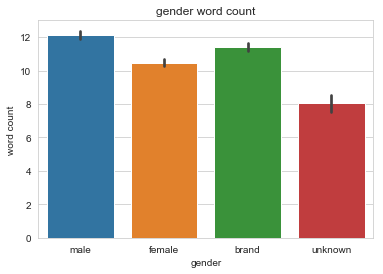

In [60]:
# plot of word count for description

# 3.1 Bar chart of gender column showing tweet_count for different categories

sns.set_style("whitegrid")
ax = sns.barplot(x="gender", y="dsword_count", data=gender_raw_df3)
# Label the axes and provide a title
ax.set_title('gender word count')
ax.set_xlabel('gender')
ax.set_ylabel('word count')

In [61]:
# 2.1 The text column is a text format data and has to be cleaned.
# In this pre-processing step the text is converted into lower case to avoid having multiple copies of the same word.

gender_clean_df = gender_raw_df.copy() # copy gender_raw_df

gender_clean_df['text_clean'] = gender_raw_df['text'].apply(lambda x: " ".join(x.lower() for x in x.split())) # convert to lower case characters

# Remove punctuation, as it doesn’t add any extra information and will reduce the size of the training data

gender_clean_df['text_clean'] = gender_clean_df['text_clean'].str.replace('[^\w\s]','') # remove punctuation

# further cleaning of non string characters

gender_clean_df.text_clean = gender_clean_df.text_clean.str.replace('[#%\'()*+,-./:;<=>?@\[\]^_`{|}~1234567890’”“′‘\\\]', ' ')  # rseplace given character

gender_clean_df.text_clean = gender_clean_df.text_clean.str.replace(r'[^\x00-\x7f]', '')   # regex replace lines with non ascii characters

gender_clean_df.text_clean = gender_clean_df.text_clean.str.replace('!', ' ')  # replace ! character.

# stop words (or commonly occurring words) should be removed from the text data

stop = stopwords.words('english')

# grab stopword list, extend it a bit, and then turn it into a set for later

stop.extend(['may','also','zero','one','two','three','four','five','six','seven','eight','nine','ten','across',
             'among','beside','however','yet','within']+list(ascii_lowercase))

stoplist = set(stop)
stop = set(sorted(stop + list(stoplist)))

gender_clean_df['text_clean'] = gender_clean_df['text_clean'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))



gender_clean_df['text_clean'].head()  # display the data

0    robbie responds critics win eddie edwards worl...
1    felt like friends living story httpstcoarnge y...
2    absolutely adore louis starts songs hits hard ...
3    hi jordanspieth looking url use ifttt dont typ...
4     watching neighbours sky catching neighbs xxx xxx
Name: text_clean, dtype: object

In [62]:
# let’s check the 10 most frequently occurring words in our text data then take call to remove or retain.

text_word_freq = pd.Series(' '.join(gender_clean_df['text_clean']).split()).value_counts()[:10]
text_word_freq

weather     2709
get         2266
channel     1387
httpstco    1378
updates     1357
im          1272
like        1004
love         733
dont         730
new          702
dtype: int64

In [63]:
# let’s remove these words as their presence will not of any use in classification of our text data.

# freq = list(freq.index)

gender_clean_df['text_clean'] = gender_clean_df['text_clean'].apply(lambda x: " ".join(x for x in x.split() if x not in text_word_freq))

gender_clean_df['text_clean'].head()

0    robbie responds critics win eddie edwards worl...
1    felt friends living story httpstcoarnge yhno r...
2    absolutely adore louis starts songs hits hard ...
3    hi jordanspieth looking url use ifttt typicall...
4     watching neighbours sky catching neighbs xxx xxx
Name: text_clean, dtype: object

In [64]:
#  Remove rarely occurring words from the text. Because they’re so rare, the association between them and other 
# words is dominated by noise.

freq_rare = pd.Series(' '.join(gender_clean_df['text_clean']).split()).value_counts()[-10:]

freq_rare

pennington                               1
kyc                                      1
akdhakskansjajhahahshahahahdmbfdjjsjd    1
mallory                                  1
unipay                                   1
cranberry                                1
httpstcontfrw                            1
cyntv                                    1
muddled                                  1
httpstcofawu                             1
dtype: int64

In [65]:
# replace rare words with a more general form and then this will have higher counts

gender_clean_df['text_clean'] = gender_clean_df['text_clean'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_rare))

gender_clean_df['text_clean'].head()

0    robbie responds critics win eddie edwards worl...
1    felt friends living story httpstcoarnge yhno r...
2    absolutely adore louis starts songs hits hard ...
3    hi jordanspieth looking url use ifttt typicall...
4     watching neighbours sky catching neighbs xxx xxx
Name: text_clean, dtype: object

In [66]:
# Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach

from nltk.stem import PorterStemmer

st = PorterStemmer()

gender_clean_df['text_clean'] = gender_clean_df['text_clean'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

gender_clean_df['text_clean'].head(5)

0    robbi respond critic win eddi edward worldtitl...
1    felt friend live stori httpstcoarng yhno retir...
2      absolut ador loui start song hit hard feel good
3    hi jordanspieth look url use ifttt typic see a...
4             watch neighbour sky catch neighb xxx xxx
Name: text_clean, dtype: object

In [67]:
gender_clean_df.head(5)

,unit_id,gender,gender_confidence,created,description,fav_number,link_color,name,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,text_clean
0,815719226,male,1.0000,12/05/13 01:48,i sing my own rhythm.,0,08C2C2,sheezy0,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.590000e+17,main; @Kan1shk3,Chennai,robbi respond critic win eddi edward worldtitl...
1,815719227,male,1.0000,10/01/12 13:51,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,äóìIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.590000e+17,NaN,Eastern Time (US & Canada),felt friend live stori httpstcoarng yhno retir...
2,815719228,male,0.6625,11/28/14 11:30,louis whining and squealing and all,7696,ABB8C2,lwtprettylaugh,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.590000e+17,clcncl,Belgrade,absolut ador loui start song hit hard feel good
3,815719229,male,1.0000,06/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,douggarland,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada),hi jordanspieth look url use ifttt typic see a...
4,815719230,female,1.0000,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,WilfordGemma,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.590000e+17,NaN,NaN,watch neighbour sky catch neighb xxx xxx


In [68]:

# compute word frequency and remove all words that don't occur at least 5 times
# df.Firm_Name.str.split(expand=True).stack().value_counts()
# pd.Series(np.concatenate([x.split() for x in df.Firm_Name])).value_counts()
# pd.Series(' '.join(df.Firm_Name).split()).value_counts()
# pd.Series(' '.join(df.Firm_Name).split()).value_counts()[:3]

In [69]:
word_freq = gender_clean_df.text_clean.str.split(expand=True).stack().value_counts()[:10]
word_freq

go        889
make      822
day       753
time      709
look      608
peopl     565
know      555
see       554
want      542
follow    527
dtype: int64

In [70]:
#filtered = df.groupby('positions').filter(lambda x: len(x) >= 3)
#filtered
#df[df['positions'].isin(counts[counts > 3].index)]
#filtered = df.groupby('positions')['r vals'].filter(lambda x: len(x) >= 3)
#df[df['r vals'].isin(filtered)]
#df.groupby('positions')['r vals'].filter(lambda x: len(x) >= 3)
# pd.Series(' '.join(df['text']).lower().split()).value_counts()[:100]

In [72]:
# clean 'description' column
gender_clean_df2 = gender_clean_df.copy()

gender_clean_df2.clean_description = gender_clean_df2.description.str.replace('[^\w\s]','')  # remove punctuations

gender_clean_df2.clean_description = gender_clean_df2.clean_description.str.replace('[#%\'()*+,-./:;<=>?@\[\]^_`{|}~1234567890’”“′‘\\\]', ' ')  # rseplace given character

gender_clean_df2.clean_description = gender_clean_df2.clean_description.str.replace(r'[^\x00-\x7f]', '')   # regex replace lines with non ascii characters

gender_clean_df2.clean_description = gender_clean_df2.clean_description.str.replace('!', ' ')  # replace ! character.


'''fill NaN values in the description column with missing then convert to lower case'''

gender_clean_df2.clean_description = gender_clean_df2.clean_description.fillna('missing')  # fill missing values with 'missing'


gender_clean_df2.clean_description = gender_clean_df2.clean_description.apply(lambda x: " ".join(x.lower() for x in x.split()))  # lower case text

gender_clean_df2['clean_description'] = gender_clean_df2.clean_description


gender_clean_df2.head(3)       

,unit_id,gender,gender_confidence,created,description,fav_number,link_color,name,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,text_clean,clean_description
0,815719226,male,1.0000,12/05/13 01:48,i sing my own rhythm.,0,08C2C2,sheezy0,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.590000e+17,main; @Kan1shk3,Chennai,robbi respond critic win eddi edward worldtitl...,i sing my own rhythm
1,815719227,male,1.0000,10/01/12 13:51,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,äóìIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.590000e+17,NaN,Eastern Time (US & Canada),felt friend live stori httpstcoarng yhno retir...,im the author of novels filled with family dra...
2,815719228,male,0.6625,11/28/14 11:30,louis whining and squealing and all,7696,ABB8C2,lwtprettylaugh,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.590000e+17,clcncl,Belgrade,absolut ador loui start song hit hard feel good,louis whining and squealing and all


In [73]:
# clean the 'names' column

gender_clean_df3 = gender_clean_df2.copy()

gender_clean_df3.name_clean = gender_clean_df3.name.apply(lambda x: x.translate(string.punctuation))
gender_clean_df3.name_clean = gender_clean_df3.name_clean.apply(lambda x: x.translate(string.digits))
gender_clean_df3.name_clean = gender_clean_df3.name_clean.str.replace('[#%\'()*+,-./:;<=>?@\[\]^_`{|}~1234567890’”“′‘\\\]', '') 


gender_clean_df3.name_clean = gender_clean_df3.name_clean.apply(lambda x: x.lower())

gender_clean_df3['name_clean'] = gender_clean_df3.name_clean

gender_clean_df3.head(2)

,unit_id,gender,gender_confidence,created,description,fav_number,link_color,name,profileimage,retweet_count,...,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,text_clean,clean_description,name_clean
0,815719226,male,1.0,12/05/13 01:48,i sing my own rhythm.,0,08C2C2,sheezy0,https://pbs.twimg.com/profile_images/414342229...,0,...,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.590000e+17,main; @Kan1shk3,Chennai,robbi respond critic win eddi edward worldtitl...,i sing my own rhythm,sheezy
1,815719227,male,1.0,10/01/12 13:51,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,https://pbs.twimg.com/profile_images/539604221...,0,...,äóìIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.590000e+17,NaN,Eastern Time (US & Canada),felt friend live stori httpstcoarng yhno retir...,im the author of novels filled with family dra...,davdburnett


In [74]:
# last three letters of name
name_last = gender_clean_df3.name_clean # name_lower to a list name_last
new_last = [x[-3:] for x in name_last]  # last three letters of name

gender_clean_df3['name_last3word'] = new_last   # name_lastword as a column in dataframe
gender_clean_df3['name_last3word'].head(5)      # show first 5 rows of column name_lastword

0    ezy
1    ett
2    ugh
3    and
4    mma
Name: name_last3word, dtype: object

In [75]:
# count the number of letters in each name. female names may be longer or less than male or brand names
# hence could indicate a pattern using the count of letters in the name
name_len = [len(x) for x in name_last]  # length of the name or count of number of letters in name

gender_clean_df3['name_count'] = name_len
gender_clean_df3['name_count'].head(5)

0     6
1    11
2    14
3    11
4    12
Name: name_count, dtype: int64

In [76]:
'''
it does train on the whole text column, not just the individual rows. Each row is considered to be point in 
vector space of words. So it trains on the whole column text (all rows) and then transforms each row into 
word vector and puts that as the new column value.'''
dd = 'dd'

In [77]:
# The variable link_color is in base 16 (Hex) code with 3001 unique values. The values can be converted to primary
# colors code numbers Red, Green, Blue (RGB)
gender_clean_df4 = gender_clean_df3.copy()

gender_clean_df4['link_color'].head(2)

0    08C2C2
1    0084B4
Name: link_color, dtype: object

In [78]:
# clean link_color column
gender_clean_df4.link_color2 = gender_clean_df4.link_color.str.replace('#', '')  # replace # character.
gender_clean_df4.link_color2 = gender_clean_df4.link_color.str.replace('2.', '2')  # replace . character.
gender_clean_df4.link_color2 = gender_clean_df4.link_color.str.replace('-', '')  # replace # character.
gender_clean_df4.link_color2 = gender_clean_df4.link_color.str.replace('[^\w\s]','')  # remove punctuations

In [79]:
# # pad to 6digit before conversion from hex to RGB color number

gender_clean_df4.lcolor2 = gender_clean_df4.link_color2.apply(lambda x: x.rjust(6, '0'))

gender_clean_df4.lcolor2.head(2)

0    08C2C2
1    0084B4
Name: link_color, dtype: object

In [80]:
gender_clean_df4['lcolor2'] = gender_clean_df4.lcolor2

# create function to convert from hex color code to RGB numbers

def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

# apply function to convert to RGB color numbers

gender_clean_df4.lcolor2cd = gender_clean_df4.lcolor2.apply(lambda x: hex_to_rgb(x))

# display the RGB color numbers

gender_clean_df4.lcolor2cd[:2]

0    (8, 194, 194)
1    (0, 132, 180)
Name: link_color, dtype: object

In [81]:
# Add the column into the dataframe

gender_clean_df4['color_rgb'] = gender_clean_df4.lcolor2cd 

gender_clean_df4['color_rgb'].head(4) #display the columns

0      (8, 194, 194)
1      (0, 132, 180)
2    (171, 184, 194)
3      (0, 132, 180)
Name: color_rgb, dtype: object

In [82]:
# convert color_rgb column to python list and then dataframe  
dfList = gender_clean_df4['color_rgb'].tolist()   # convert to python list

color_df = pd.DataFrame(dfList, columns=['color_red', 'color_green', 'color_blue','color_ex'])  # convert to dataframe 

color_df = color_df.drop(['color_ex'], axis=1) # drop coloumn color_ex as it is NaN values


In [83]:
# create a new dataframe and add each column of colors

gender_clean_df5 = gender_clean_df4.copy()
gender_clean_df5['color_red'] = color_df.color_red.tolist()
gender_clean_df5['color_green'] = color_df.color_green.tolist()
gender_clean_df5['color_blue'] = color_df.color_blue.tolist()

# rename color

gender_clean_df5 = gender_clean_df5.rename(index=str, columns={"color_red": "linkcolor_red", "color_green": "linkcolor_green", "color_blue": "linkcolor_blue"})

gender_clean_df5.head(2)

,unit_id,gender,gender_confidence,created,description,fav_number,link_color,name,profileimage,retweet_count,...,text_clean,clean_description,name_clean,name_last3word,name_count,lcolor2,color_rgb,linkcolor_red,linkcolor_green,linkcolor_blue
0,815719226,male,1.0,12/05/13 01:48,i sing my own rhythm.,0,08C2C2,sheezy0,https://pbs.twimg.com/profile_images/414342229...,0,...,robbi respond critic win eddi edward worldtitl...,i sing my own rhythm,sheezy,ezy,6,08C2C2,"(8, 194, 194)",8,194,194
1,815719227,male,1.0,10/01/12 13:51,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,https://pbs.twimg.com/profile_images/539604221...,0,...,felt friend live stori httpstcoarng yhno retir...,im the author of novels filled with family dra...,davdburnett,ett,11,0084B4,"(0, 132, 180)",0,132,180


In [84]:
# convert sidebar color to RGB numbers

gender_clean_df5.sidebar_color[:5]  # display the first 5 values of the column

0    FFFFFF
1    C0DEED
2    C0DEED
3    C0DEED
4         0
Name: sidebar_color, dtype: object

In [85]:
# clean up punctuations and meta caharcters in sidebar_colors
gender_clean_df6 = gender_clean_df5.copy()
gender_clean_df6.sidebar_color = gender_clean_df5.sidebar_color.str.replace('[^\w\s]','')  # remove punctuations

# # pad to 6digit before conversion from hex to RGB color number

gender_clean_df6.sidebar_color = gender_clean_df6.sidebar_color.apply(lambda x: x.rjust(6, '0'))

# apply function to convert to RGB color numbers

gender_clean_df6.sidebar_colorrgb = gender_clean_df6.sidebar_color.apply(lambda x: hex_to_rgb(x))


In [86]:
# convert color_rgb column to python list and then dataframe  
sidebarlist = gender_clean_df6.sidebar_colorrgb.tolist()   # convert to python list

sidebar_df = pd.DataFrame(sidebarlist, columns=['sidebar_red', 'sidebar_green', 'sidebar_blue'])  # convert to dataframe 


# create a new dataframe and add each column of colors to gender_clean_df6

gender_clean_df6['sidebar_red'] = sidebar_df.sidebar_red.tolist()
gender_clean_df6['sidebar_green'] = sidebar_df.sidebar_green.tolist()
gender_clean_df6['sidebar_blue'] = sidebar_df.sidebar_blue.tolist()

gender_clean_df6.head(2)

,unit_id,gender,gender_confidence,created,description,fav_number,link_color,name,profileimage,retweet_count,...,name_last3word,name_count,lcolor2,color_rgb,linkcolor_red,linkcolor_green,linkcolor_blue,sidebar_red,sidebar_green,sidebar_blue
0,815719226,male,1.0,12/05/13 01:48,i sing my own rhythm.,0,08C2C2,sheezy0,https://pbs.twimg.com/profile_images/414342229...,0,...,ezy,6,08C2C2,"(8, 194, 194)",8,194,194,255,255,255
1,815719227,male,1.0,10/01/12 13:51,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,https://pbs.twimg.com/profile_images/539604221...,0,...,ett,11,0084B4,"(0, 132, 180)",0,132,180,192,222,237


In [87]:
# clean tweet_location column

gender_clean_df6.tweet_location[:5]  # display the first five columns of the column

0    main; @Kan1shk3
1                NaN
2             clcncl
3      Palo Alto, CA
4                NaN
Name: tweet_location, dtype: object

In [88]:
# clean meta characters and convert to word vectors. location gives the city names without full adress that can
# be converted to geographic coordinates

gender_clean_df7 = gender_clean_df6.copy()
gender_clean_df7.tweet_location = gender_clean_df6.tweet_location.str.replace('[^\w\s]','')  # remove punctuations

gender_clean_df7.tweet_location = gender_clean_df7.tweet_location.str.replace(r'[^\x00-\x7f]', '')

gender_clean_df7.tweet_location = gender_clean_df7.tweet_location.str.replace('[#%\'()*+,-./:;<=>?@\[\]^_`{|}~1234567890’”“′‘\\\]', ' ')

'''fill NaN values in tweet_location with 'miss' then convert to lower case'''

gender_clean_df7.tweet_location = gender_clean_df7.tweet_location.fillna('miss')  # fill missing values with 'missing'

# convert to lower case

gender_clean_df7.tweet_location = gender_clean_df7.tweet_location.apply(lambda x: x.lower())


gender_clean_df7.tweet_location[:2]

0    main kan shk 
1             miss
Name: tweet_location, dtype: object

In [89]:
from pyspark.sql.session import SparkSession

# instantiate Spark
spark = SparkSession.builder.getOrCreate()


# create pyspark dataframe

gender_loc_df7 = gender_clean_df7.loc[:,['unit_id','tweet_location']] # select unit_id and tweet_location

spark_loc_df7 = spark.createDataFrame(gender_loc_df7)
# display two rows

spark_loc_df7.show(n=2)


+---------+--------------+
|  unit_id|tweet_location|
+---------+--------------+
|815719226| main kan shk |
|815719227|          miss|
+---------+--------------+
only showing top 2 rows



In [90]:
# tokenise the words

tokenizer = Tokenizer(inputCol="tweet_location", outputCol="words")
loc_wordsData = tokenizer.transform(spark_loc_df7)

loc_wordsData.show(n=2)

+---------+--------------+----------------+
|  unit_id|tweet_location|           words|
+---------+--------------+----------------+
|815719226| main kan shk |[main, kan, shk]|
|815719227|          miss|          [miss]|
+---------+--------------+----------------+
only showing top 2 rows



In [91]:
loc_words_df = loc_wordsData.select('words')

loc_words_df.show(n=2)

+----------------+
|           words|
+----------------+
|[main, kan, shk]|
|          [miss]|
+----------------+
only showing top 2 rows



In [92]:
# Learn a mapping from words to Vectors.

loc_word2Vec = Word2Vec(vectorSize=3, minCount=0, inputCol="words", outputCol="result")

loc_model = loc_word2Vec.fit(loc_words_df)

loc_result = loc_model.transform(loc_words_df)


loc_result.show(n=3)

+----------------+--------------------+
|           words|              result|
+----------------+--------------------+
|[main, kan, shk]|[-0.0560951127360...|
|          [miss]|[0.13988752663135...|
|        [clcncl]|[0.11411163955926...|
+----------------+--------------------+
only showing top 3 rows



In [93]:
for row in loc_result.take(2):
    print(row)

Row(words=['main', 'kan', 'shk'], result=DenseVector([-0.0561, 0.0123, -0.0186]))
Row(words=['miss'], result=DenseVector([0.1399, -0.1447, -0.0589]))


In [94]:
loc_result_df2 = loc_result.toPandas()
# convert result to list then a dataframe

dfresult = loc_result_df2['result'].tolist()   # convert to python list

result_pd_df = pd.DataFrame(dfresult, columns=['namevec1', 'namevec2', 'namevec3'], index = range(20050)) # to datafram

gender_clean_df7.index = range(20050)

gender_clean_df8 = pd.concat([gender_clean_df7, result_pd_df], axis=1)

gender_clean_df8.head(3)

,unit_id,gender,gender_confidence,created,description,fav_number,link_color,name,profileimage,retweet_count,...,color_rgb,linkcolor_red,linkcolor_green,linkcolor_blue,sidebar_red,sidebar_green,sidebar_blue,namevec1,namevec2,namevec3
0,815719226,male,1.0000,12/05/13 01:48,i sing my own rhythm.,0,08C2C2,sheezy0,https://pbs.twimg.com/profile_images/414342229...,0,...,"(8, 194, 194)",8,194,194,255,255,255,-0.056095,0.012309,-0.018646
1,815719227,male,1.0000,10/01/12 13:51,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,https://pbs.twimg.com/profile_images/539604221...,0,...,"(0, 132, 180)",0,132,180,192,222,237,0.139888,-0.144741,-0.058950
2,815719228,male,0.6625,11/28/14 11:30,louis whining and squealing and all,7696,ABB8C2,lwtprettylaugh,https://pbs.twimg.com/profile_images/657330418...,1,...,"(171, 184, 194)",171,184,194,192,222,237,0.114112,0.061452,0.059334


In [95]:
''' The user_timezone showa the timezone of user location at the time of twitt. The timezones change
over a period of time. Some users only indicated the city name which is not the correct time zone, hence converting
the city to cuerrent time zone may be different from the timezone at twitt time. The column was vectorised to derive
3 word vectors'''

gender_clean_df8.user_timezone.head(5)

0                       Chennai
1    Eastern Time (US & Canada)
2                      Belgrade
3    Pacific Time (US & Canada)
4                           NaN
Name: user_timezone, dtype: object

In [96]:
# clean meta characters and convert to word vectors. location gives the city names without full adress that can
# be converted to geographic coordinates

gender_clean_df9 = gender_clean_df8.copy()
gender_clean_df9.user_timezone = gender_clean_df8.user_timezone.str.replace('[^\w\s]','')  # remove punctuations

gender_clean_df9.user_timezone = gender_clean_df9.user_timezone.str.replace(r'[^\x00-\x7f]', '')

gender_clean_df9.user_timezone = gender_clean_df9.user_timezone.str.replace('[#%\'()*+,-./:;<=>?@\[\]^_`{|}~1234567890’”“′‘\\\]', ' ')

'''fill NaN values in tweet_location with 'miss' then convert to lower case'''

gender_clean_df9.user_timezone = gender_clean_df9.user_timezone.fillna('miss')  # fill missing values with 'missing'

# convert to lower case

gender_clean_df9.user_timezone = gender_clean_df9.user_timezone.apply(lambda x: x.lower())

gender_clean_df9.user_timezone.head(3)

0                    chennai
1    eastern time us  canada
2                   belgrade
Name: user_timezone, dtype: object

In [97]:
# create pyspark dataframe
spark_timezone_df9 = gender_clean_df9.loc[:,['unit_id','user_timezone']] # select unit_id and user_timezone

spark_timezone_df9 = spark.createDataFrame(spark_timezone_df9)

# display two rows

spark_timezone_df9.show(n=2)

+---------+--------------------+
|  unit_id|       user_timezone|
+---------+--------------------+
|815719226|             chennai|
|815719227|eastern time us  ...|
+---------+--------------------+
only showing top 2 rows



In [98]:
# tokenise the words

tz_tokenizer = Tokenizer(inputCol="user_timezone", outputCol="tz_words")
tz_wordsData = tz_tokenizer.transform(spark_timezone_df9)

tz_wordsData.show(n=2)

+---------+--------------------+--------------------+
|  unit_id|       user_timezone|            tz_words|
+---------+--------------------+--------------------+
|815719226|             chennai|           [chennai]|
|815719227|eastern time us  ...|[eastern, time, u...|
+---------+--------------------+--------------------+
only showing top 2 rows



In [99]:
# Learn a mapping from words to Vectors.

tz_word2Vec = Word2Vec(vectorSize=3, minCount=0, inputCol="tz_words", outputCol="tz_result")

tz_model = tz_word2Vec.fit(tz_wordsData)

tz_transform = tz_model.transform(tz_wordsData)

tz_transform.show(n=3)

+---------+--------------------+--------------------+--------------------+
|  unit_id|       user_timezone|            tz_words|           tz_result|
+---------+--------------------+--------------------+--------------------+
|815719226|             chennai|           [chennai]|[0.02757690288126...|
|815719227|eastern time us  ...|[eastern, time, u...|[-0.2873494982719...|
|815719228|            belgrade|          [belgrade]|[0.09708758443593...|
+---------+--------------------+--------------------+--------------------+
only showing top 3 rows



In [100]:
# convert result to pandas, then to pandas list then a dataframe

tz_transform_df = tz_transform.toPandas()

tz_result_list = tz_transform_df['tz_result'].tolist()   # convert to python list

tz_result_df = pd.DataFrame(tz_result_list, columns=['tzvec1', 'tzvec2', 'tzvec3'], index = range(20050)) #to datafram

tz_result_df.head(3)

,tzvec1,tzvec2,tzvec3
0,0.027577,0.016826,-0.057374
1,-0.287349,0.302401,1.356255
2,0.097088,-0.061970,-0.118187


In [101]:
# merge to gender_clean_df9 dataframe

gender_clean_df9.index = range(20050) # index the dataframe for merging

gender_clean_df9 = pd.concat([gender_clean_df9, tz_result_df], axis=1)

gender_clean_df9.head(3)

,unit_id,gender,gender_confidence,created,description,fav_number,link_color,name,profileimage,retweet_count,...,linkcolor_blue,sidebar_red,sidebar_green,sidebar_blue,namevec1,namevec2,namevec3,tzvec1,tzvec2,tzvec3
0,815719226,male,1.0000,12/05/13 01:48,i sing my own rhythm.,0,08C2C2,sheezy0,https://pbs.twimg.com/profile_images/414342229...,0,...,194,255,255,255,-0.056095,0.012309,-0.018646,0.027577,0.016826,-0.057374
1,815719227,male,1.0000,10/01/12 13:51,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,https://pbs.twimg.com/profile_images/539604221...,0,...,180,192,222,237,0.139888,-0.144741,-0.058950,-0.287349,0.302401,1.356255
2,815719228,male,0.6625,11/28/14 11:30,louis whining and squealing and all,7696,ABB8C2,lwtprettylaugh,https://pbs.twimg.com/profile_images/657330418...,1,...,194,192,222,237,0.114112,0.061452,0.059334,0.097088,-0.061970,-0.118187


In [102]:
'''The column created is the date and time of the twitt. It shows the year, month, day and minute'''

# rename the column created to date_created

gender_clean_df9 = gender_clean_df9.rename(index=str, columns={"created": "date_created"})

# convert to datetime
gender_clean_df9['date_created'] = pd.to_datetime(gender_clean_df9['date_created'])

# split to year, month, day, hour and second

gender_clean_df9['year'] = gender_clean_df9['date_created'].dt.year.astype(str).tolist()
gender_clean_df9['month'] = gender_clean_df9['date_created'].dt.month.astype(str).tolist()
gender_clean_df9['day'] = gender_clean_df9['date_created'].dt.day.astype(str).tolist()
gender_clean_df9['hour'] = gender_clean_df9['date_created'].dt.hour.astype(str).tolist()
gender_clean_df9['second'] = gender_clean_df9['date_created'].dt.minute.astype(str).tolist()

# drop the column date_created
gender_clean_df9 = gender_clean_df9.drop(['date_created'], axis = 1)

# display the datframe
gender_clean_df9.head(5)

,unit_id,gender,gender_confidence,description,fav_number,link_color,name,profileimage,retweet_count,sidebar_color,...,namevec2,namevec3,tzvec1,tzvec2,tzvec3,year,month,day,hour,second
0,815719226,male,1.0000,i sing my own rhythm.,0,08C2C2,sheezy0,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,...,0.012309,-0.018646,0.027577,0.016826,-0.057374,2013,12,5,1,48
1,815719227,male,1.0000,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,...,-0.144741,-0.058950,-0.287349,0.302401,1.356255,2012,10,1,13,51
2,815719228,male,0.6625,louis whining and squealing and all,7696,ABB8C2,lwtprettylaugh,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,...,0.061452,0.059334,0.097088,-0.061970,-0.118187,2014,11,28,11,30
3,815719229,male,1.0000,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,douggarland,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,...,-0.096245,-0.274329,-0.276759,0.303237,1.348049,2009,6,11,22,39
4,815719230,female,1.0000,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,WilfordGemma,https://pbs.twimg.com/profile_images/564094871...,0,000000,...,-0.144741,-0.058950,0.165157,-0.145163,-0.059959,2014,4,16,13,23


In [103]:
# select and drop transformed columns to create final clean dataframe
# The text, description and namelast3word columns will be vecrorised and dropped later

col_drop = ['description', 'link_color', 'name', 'sidebar_color', 'text', 'tweet_location', 'user_timezone', 'lcolor2', 'color_rgb', 'name_clean']

# drop columns
gender_clean_df10 = gender_clean_df9.drop(col_drop, axis = 1)

# display dataframe

gender_clean_df10.iloc[0:2,0:11]


,unit_id,gender,gender_confidence,fav_number,profileimage,retweet_count,tweet_coord,tweet_count,tweet_created,tweet_id,text_clean
0,815719226,male,1.0,0,https://pbs.twimg.com/profile_images/414342229...,0,NaN,110964,10/26/15 12:40,6.590000e+17,robbi respond critic win eddi edward worldtitl...
1,815719227,male,1.0,68,https://pbs.twimg.com/profile_images/539604221...,0,NaN,7471,10/26/15 12:40,6.590000e+17,felt friend live stori httpstcoarng yhno retir...


In [104]:
gender_clean_df10.iloc[0:2,13:40]

,name_count,linkcolor_red,linkcolor_green,linkcolor_blue,sidebar_red,sidebar_green,sidebar_blue,namevec1,namevec2,namevec3,tzvec1,tzvec2,tzvec3,year,month,day,hour,second
0,6,8,194,194,255,255,255,-0.056095,0.012309,-0.018646,0.027577,0.016826,-0.057374,2013,12,5,1,48
1,11,0,132,180,192,222,237,0.139888,-0.144741,-0.058950,-0.287349,0.302401,1.356255,2012,10,1,13,51


In [105]:
# display dataframe information

gender_clean_df10.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20050 entries, 0 to 20049
Data columns (total 31 columns):
unit_id              20050 non-null int64
gender               19953 non-null object
gender_confidence    20024 non-null float64
fav_number           20050 non-null int64
profileimage         20050 non-null object
retweet_count        20050 non-null int64
tweet_coord          159 non-null object
tweet_count          20050 non-null int64
tweet_created        20050 non-null object
tweet_id             20050 non-null float64
text_clean           20050 non-null object
clean_description    20050 non-null object
name_last3word       20050 non-null object
name_count           20050 non-null int64
linkcolor_red        20050 non-null int64
linkcolor_green      20050 non-null int64
linkcolor_blue       20050 non-null int64
sidebar_red          20050 non-null int64
sidebar_green        20050 non-null int64
sidebar_blue         20050 non-null int64
namevec1             20050 non-null float64
nam

In [106]:
# save out the data to disc

gender_clean_df10.to_csv("/gender_clean_df10.csv")

In [107]:
#1.1  import data and created pandas dataframe.
gender_exp_df =  pd.read_csv("/gender_clean_df10.csv",na_values=' ')


gender_exp_df.head(2)   # diaplay dataframe

,Unnamed: 0,unit_id,gender,gender_confidence,fav_number,profileimage,retweet_count,tweet_coord,tweet_count,tweet_created,...,namevec2,namevec3,tzvec1,tzvec2,tzvec3,year,month,day,hour,second
0,0,815719226,male,1.0,0,https://pbs.twimg.com/profile_images/414342229...,0,NaN,110964,10/26/15 12:40,...,0.012309,-0.018646,0.027577,0.016826,-0.057374,2013,12,5,1,48
1,1,815719227,male,1.0,68,https://pbs.twimg.com/profile_images/539604221...,0,NaN,7471,10/26/15 12:40,...,-0.144741,-0.058950,-0.287349,0.302401,1.356255,2012,10,1,13,51


In [108]:
# 3.0 Exploration Data Analysis

'''
In this section visual plots and tables are used to explore the variables especially as good predictors of
different categories of gender.
The relationship between variables are visualised and the hypotheses proposed.
'''
from datetime import timedelta
import plotly
import xml.etree.ElementTree as et
from math import sin, cos, sqrt, atan2, radians
# from geopy.distance import distance
from plotly.graph_objs import Data, Scatter, Layout, Figure, Histogram
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.core.display import display, HTML
#import gmaps
from IPython.display import Image
import plotly.plotly as ply
#from matplotlib import basemap

In [109]:
# Set some parameters to apply to all plots.
import matplotlib
# Plot size to 14" x 7"
matplotlib.rc('figure', figsize = (14, 7))
# Font size to 14
matplotlib.rc('font', size = 14)
# Do not display top and right frame lines
matplotlib.rc('axes.spines', top = False, right = False)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

Text(0,0.5,'Count')

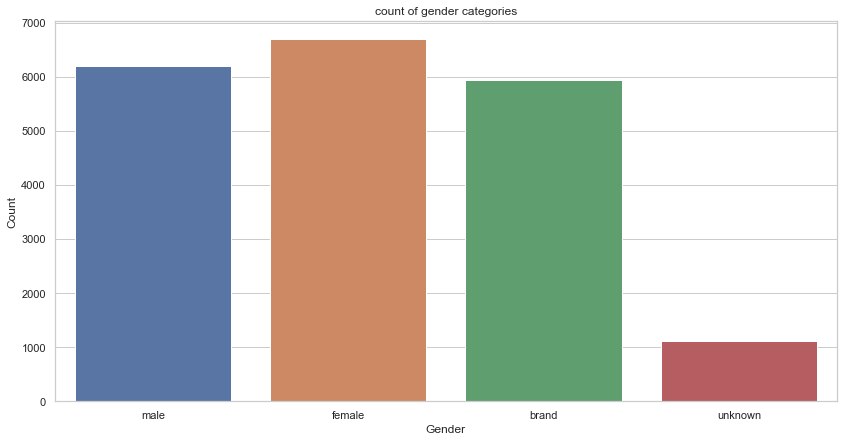

In [110]:
# function for Bar chart

sns.set(style="whitegrid")

ax = sns.countplot(x="gender", data=gender_exp_df)
# Label the axes and provide a title
ax.set_title('count of gender categories')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')

C:\Users\yasser\Anaconda2\envs\pyt36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0,0.5,'Number of tweets')

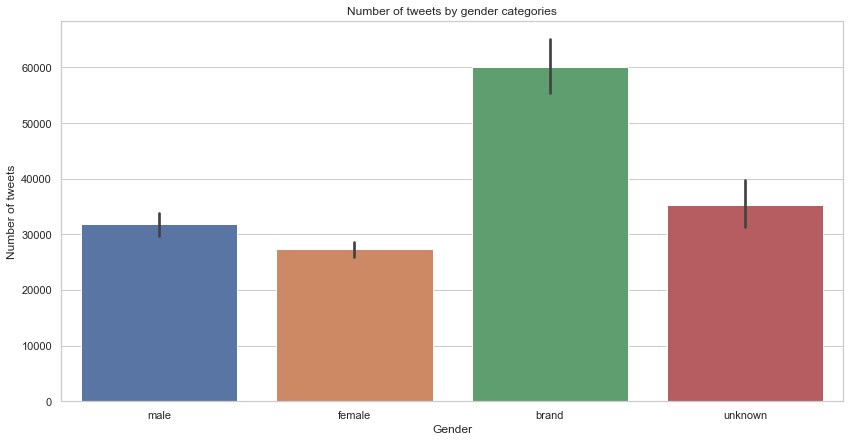

In [111]:
# 3.1 Bar chart of gender column showing tweet_count for different categories

sns.set_style("whitegrid")
ax = sns.barplot(x="gender", y="tweet_count", data=gender_exp_df)
# Label the axes and provide a title
ax.set_title('Number of tweets by gender categories')
ax.set_xlabel('Gender')
ax.set_ylabel('Number of tweets')

C:\Users\yasser\Anaconda2\envs\pyt36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



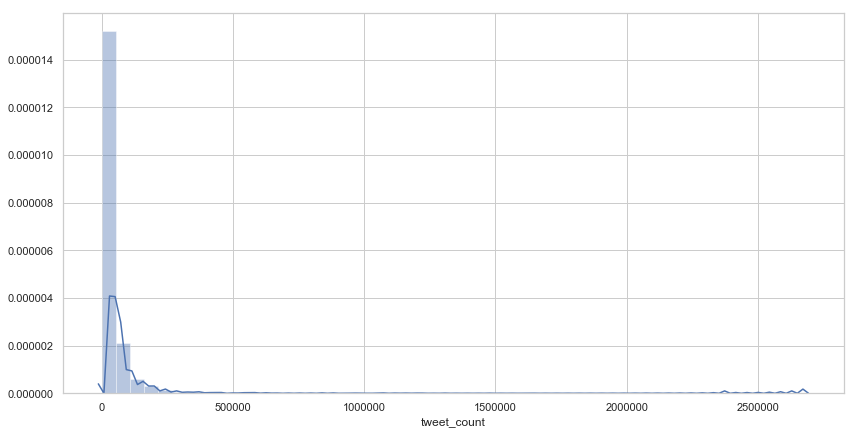

In [112]:
# 2.1 Ploting quantitative variables
# histogram

sns.distplot(gender_exp_df.tweet_count.dropna())
plt.show()


C:\Users\yasser\Anaconda2\envs\pyt36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



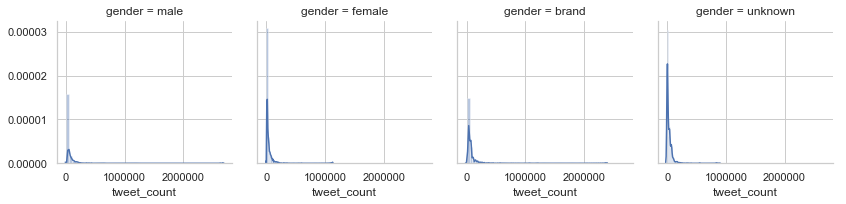

In [113]:
# histogram of tweet count using facet to show histogram for different categories of gender

g = sns.FacetGrid(gender_exp_df, col='gender')
g.map(sns.distplot, "tweet_count")
plt.show()


C:\Users\yasser\Anaconda2\envs\pyt36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



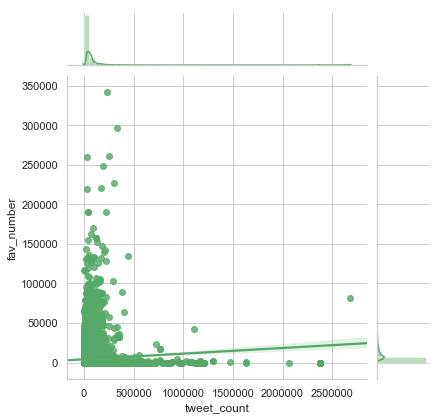

In [114]:
'''jointplot: This method is used to display data points according to two variables, along with both their distributions, kernel density estimators, and an optional regression that fits the data. With reg we indicate that we want a regression fit to the data.
In this case, although there appears to be a small tendency upwards shown by the regression, there appears to be almost no correlation between the variables “age” and “fare”, as shown by the Pearsoncorrelation coefficient.
'''

sns.jointplot(data=gender_exp_df, x='tweet_count', y='fav_number', kind='reg', color='g')
plt.show()


In [115]:
# Define a function to create the scatterplot. 

def scatterplot(x_data, y_data, x_label, y_label, title):
    _, ax = plt.subplots()  # Create the plot object
    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 30, color = '#539caf', alpha = 0.75)
    
    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

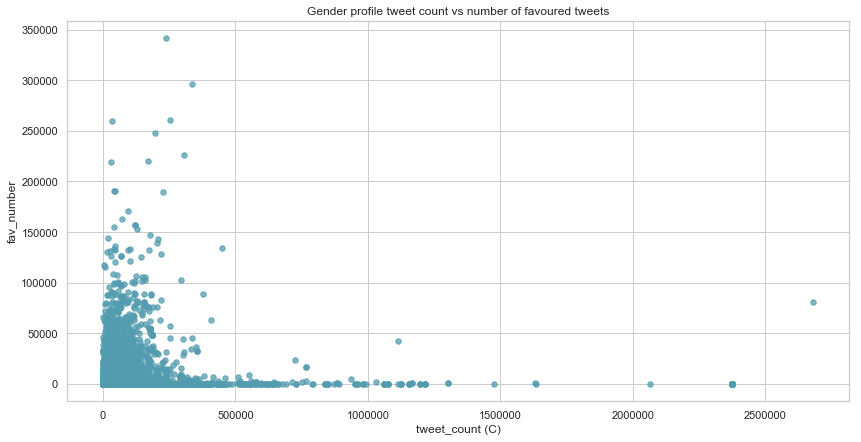

In [116]:
# Call the function to create plot
scatterplot(x_data = gender_exp_df['tweet_count']
            , y_data = gender_exp_df['fav_number']
            , x_label = 'tweet_count (C)'
            , y_label = 'fav_number'
            , title = 'Gender profile tweet count vs number of favoured tweets')

In [117]:
'''
Histogram
Histograms are used to get a rough idea of how a quantitative variable is distributed. The observed values are placed into 
different bins and the frequency of observations in each of those bins is calculated'''

# Define a function for a histogram
def histogram(data, x_label, y_label, title):
    _, ax = plt.subplots()
    ax.hist(data, color = '#539caf')
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)	

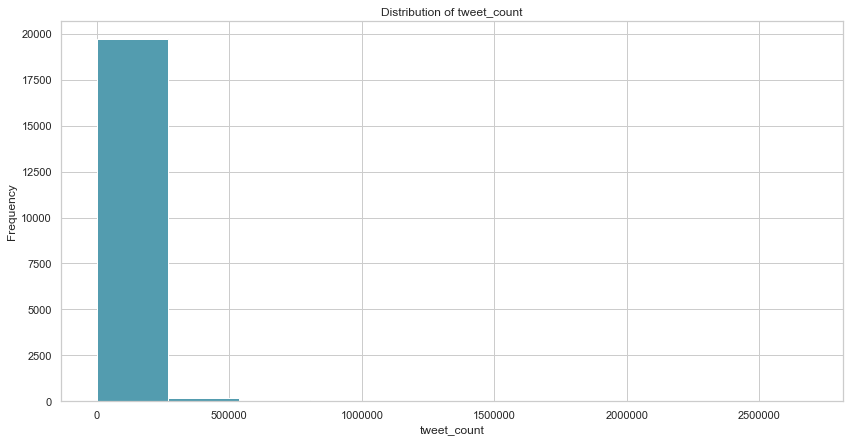

In [118]:
# 2.2.1  Histogram of tweet_count

# Call the function to create plot
histogram(data = gender_exp_df['tweet_count']
           , x_label = 'tweet_count'
           , y_label = 'Frequency'
           , title = 'Distribution of tweet_count')

Text(0.5,0,'favoured tweets')

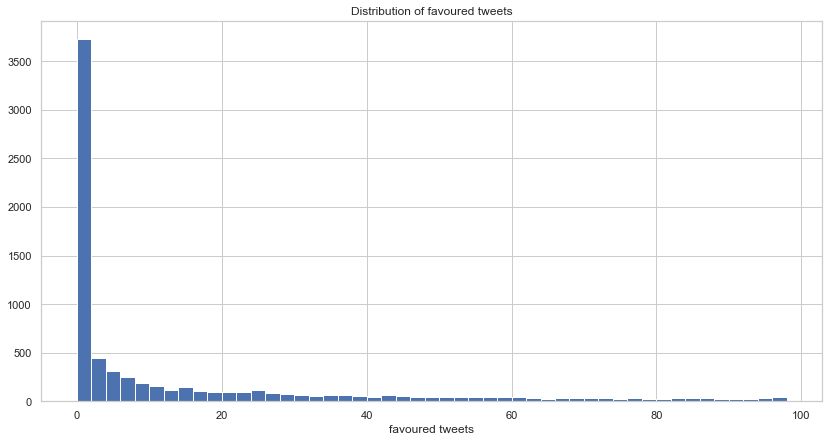

In [119]:
# plot histogram

favour_twit = gender_exp_df['fav_number']
bins = np.arange(0,100,2)
plt.hist(favour_twit, bins)
plt.title('Distribution of favoured tweets')
plt.xlabel('favoured tweets')


In [120]:
''' 2.3 Bar Plot
The simple bar plot is best used when there is just one level of grouping to your variable Box Plot
Box plots are most suited to displaying the distribution of a variable across multiple groups. The bottom and top of the boxes
indicate the lower and upper quartiles, respectively, and the line inside the box is for the median. Vertical lines extending
from the boxes ("whiskers") show the range of the data (by default, this is 1.5x past the upper and lower quartiles in matplotlib).
Box plots can be thought of as a hybrid between bar plots and overlaid histograms. They surface much of the same information as bar
plots, but they also expose the variation in the data. However, they do not show the underlying distribution of the data.
'''
beee ='bee'


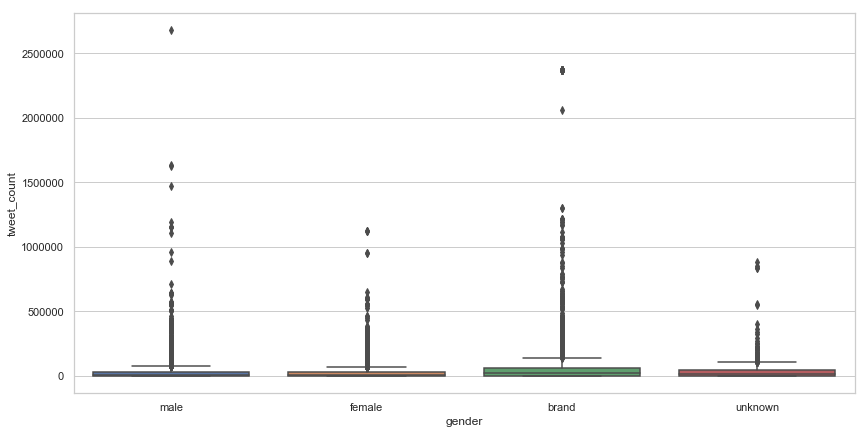

In [121]:
ax = sns.boxplot(x="gender", y="tweet_count", data=gender_exp_df)

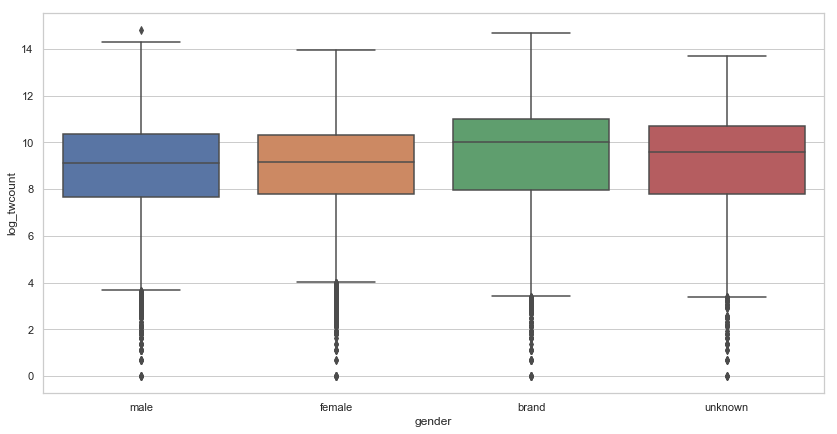

In [122]:
data=gender_exp_df['log_twcount'] = gender_exp_df.tweet_count.apply(np.log)   # Get the log of the data

ax = sns.boxplot(x="gender", y="log_twcount", data=gender_exp_df)

In [124]:
'''
4.0 Feature extraction, transformation and Engineering'''
b = 'b'

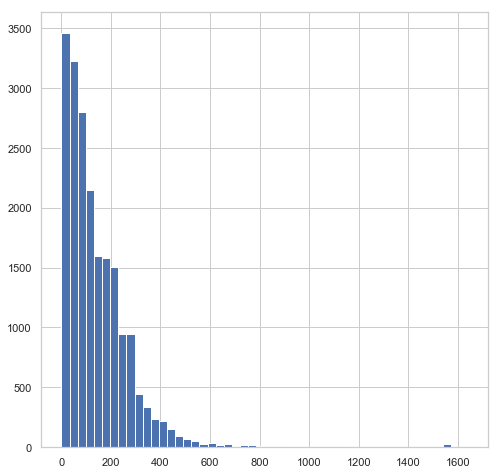

In [125]:
# 4.1 tweet count is a continuous numerical variable
# histogram and boxplot shows outlier values

# transform using square root

sqrt_twcount = gender_exp_df.tweet_count.apply(np.sqrt) # Get the square root of data points*

sqrt_twcount.hist(figsize=(8,8),     # Plot histogram
                 bins=50)
plt.show()

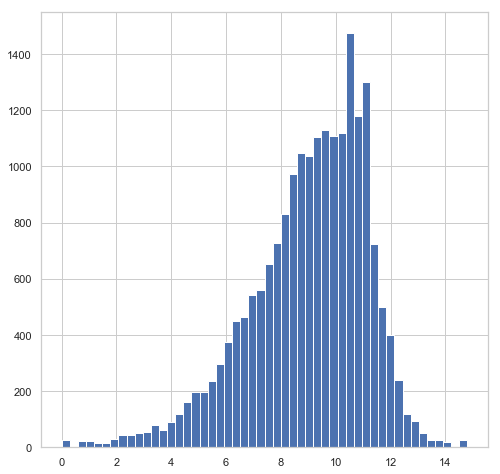

In [126]:
# log transform

log_twcount = gender_exp_df.tweet_count.apply(np.log)   # Get the log of the data
gender_exp_df['log_twcount'] = log_twcount
log_twcount.hist(figsize = (8,8),          # Plot histogram
                 bins=50) 
plt.show()

In [127]:
# binarise count or frequency of occurance

binarize_twcount = np.array(gender_exp_df['tweet_count']) 
binarize_twcount[binarize_twcount >= 1] = 1
gender_exp_df['binarize_twcount'] = binarize_twcount

#using scikit-learn's Binarizer class here from preprocessing module to binarize instead of numpy arrays.
from sklearn.preprocessing import Binarizer
bn = Binarizer(threshold=0.9)

sk_binarize_twcount = bn.transform([gender_exp_df['tweet_count']])[0]

gender_exp_df['sk_binarize_twcount'] = sk_binarize_twcount


gender_exp_df[['tweet_count','sk_binarize_twcount','binarize_twcount']].head(11)


,tweet_count,sk_binarize_twcount,binarize_twcount
0,110964,1,1
1,7471,1,1
2,5617,1,1
3,1693,1,1
4,31462,1,1
5,20036,1,1
6,13354,1,1
7,112117,1,1
8,482,1,1
9,26085,1,1


In [128]:
# fav_number measures the popularity of tweets

gender_exp_df['fav_percent'] = gender_exp_df.fav_number/np.sum(gender_exp_df.fav_number)*100

gender_exp_df['fav_percent'].head(5)

0    0.000000
1    0.000077
2    0.008759
3    0.000230
4    0.042473
Name: fav_percent, dtype: float64

In [129]:
# Rounding to 1000

gender_exp_df['fav_pop1000'] = np.array(np.round((gender_exp_df['fav_percent'] * 1000)),  dtype='int') 

gender_exp_df['fav_pop1000'].head(5)

0     0
1     0
2     9
3     0
4    42
Name: fav_pop1000, dtype: int32

In [130]:
# build a feature called interaction showing the interaction between tweet count and fav_number
tw_countfav = gender_exp_df[['tweet_count', 'fav_number']]

from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, interaction_only=False,  
                        include_bias=False)

res = pf.fit_transform(tw_countfav)

res[:5]

array([[1.10964000e+05, 0.00000000e+00, 1.23130093e+10, 0.00000000e+00,
        0.00000000e+00],
       [7.47100000e+03, 6.80000000e+01, 5.58158410e+07, 5.08028000e+05,
        4.62400000e+03],
       [5.61700000e+03, 7.69600000e+03, 3.15506890e+07, 4.32284320e+07,
        5.92284160e+07],
       [1.69300000e+03, 2.02000000e+02, 2.86624900e+06, 3.41986000e+05,
        4.08040000e+04],
       [3.14620000e+04, 3.73180000e+04, 9.89857444e+08, 1.17409892e+09,
        1.39263312e+09]])

In [131]:
# degrees of interaction

degree_df = pd.DataFrame(pf.powers_, columns=['count_degree','fav_degree'])


degree_df.head(5)

,count_degree,fav_degree
0,1,0
1,0,1
2,2,0
3,1,1
4,0,2


In [132]:
# interaction features

intr_features = pd.DataFrame(res, columns=['tweet_count', 'fav_number',  
                                           'tweet_count^2', 
                                           'tweet_countxfav_number',  
                                           'fav_number^2'])
intr_features.head(5)


,tweet_count,fav_number,tweet_count^2,tweet_countxfav_number,fav_number^2
0,110964.0,0.0,1.231301e+10,0.000000e+00,0.000000e+00
1,7471.0,68.0,5.581584e+07,5.080280e+05,4.624000e+03
2,5617.0,7696.0,3.155069e+07,4.322843e+07,5.922842e+07
3,1693.0,202.0,2.866249e+06,3.419860e+05,4.080400e+04
4,31462.0,37318.0,9.898574e+08,1.174099e+09,1.392633e+09


In [133]:
# categorical feature engineering ( norminal user_timezone, user_location, text. description)

In [134]:
# features from text data
# as a feature the positive and negative sentiment polarity of text by different categories of gender could be a differentiator.
# using textBlob the polarity of texts are extracted for as classification feature
'''
Spark.ml.feautures.Word2Vec vectorize sentences
Spark (naively) uses average of vectors for all words in the document as representation of the document.
"The Word2VecModel transforms each document into a vector using the average of all words in the document;
this vector can then be used as features for prediction, document similarity calculations, etc
'''
from textblob import TextBlob

gender_exp_df['text_clean'] = gender_exp_df['text_clean'].astype(str)

gender_exp_df['text_sentiment'] = gender_exp_df['text_clean'].apply(lambda x: TextBlob(x).sentiment[0] )

gender_exp_df[['text_clean','text_sentiment']].head(2)



,text_clean,text_sentiment
0,robbi respond critic win eddi edward worldtitl...,0.800000
1,felt friend live stori httpstcoarng yhno retir...,0.136364


In [135]:
# tweet text vectorisation
from pyspark.sql.session import SparkSession

# instantiate Spark
spark = SparkSession.builder.getOrCreate()

gender_text_df11 = gender_exp_df.loc[:,['unit_id','text_clean']].astype(str) # select unit_id and text_clean

# create pyspark dataframe
spark_text_df11 = spark.createDataFrame(gender_text_df11)

# display two rows

#spark_timezone_df9.show(n=2)

# tokenise the words

txt_tokenizer = Tokenizer(inputCol="text_clean", outputCol="text_words")
txt_wordsData = txt_tokenizer.transform(spark_text_df11)

#txt_wordsData.show(n=2)

# Learn a mapping from words to Vectors.

txt_word2Vec = Word2Vec(vectorSize=7, minCount=0, inputCol="text_words", outputCol="txt_result")

txt_model = txt_word2Vec.fit(txt_wordsData)

txt_transform = txt_model.transform(txt_wordsData)


# change to pandas dataframe and merge to major dataframe

text_result_df2 = txt_transform.toPandas()
# convert result to list then a dataframe

Txtresult = text_result_df2['txt_result'].tolist()   # convert to python list

txtresult_pd_df = pd.DataFrame(Txtresult, columns=['textvec1', 'textvec2', 'textvec3', 'textvec4', 'textvec5', 'textvec6', 'textvec7'], index = range(20050)) # to datafram

gender_exp_df.index = range(20050)

# merge to gender_exp_df dataframe
gender_exp_df12 = pd.concat([gender_exp_df, txtresult_pd_df], axis=1)

gender_exp_df12.head(3)


,Unnamed: 0,unit_id,gender,gender_confidence,fav_number,profileimage,retweet_count,tweet_coord,tweet_count,tweet_created,...,fav_percent,fav_pop1000,text_sentiment,textvec1,textvec2,textvec3,textvec4,textvec5,textvec6,textvec7
0,0,815719226,male,1.0000,0,https://pbs.twimg.com/profile_images/414342229...,0,NaN,110964,10/26/15 12:40,...,0.000000,0,0.800000,-0.005874,0.094237,-0.009487,-0.009862,-0.028193,0.069530,0.018526
1,1,815719227,male,1.0000,68,https://pbs.twimg.com/profile_images/539604221...,0,NaN,7471,10/26/15 12:40,...,0.000077,0,0.136364,0.027986,0.127141,-0.055437,0.003331,-0.075345,0.053394,0.026976
2,2,815719228,male,0.6625,7696,https://pbs.twimg.com/profile_images/657330418...,1,NaN,5617,10/26/15 12:40,...,0.008759,9,0.204167,0.025116,0.212035,-0.110323,0.029419,-0.061153,0.054980,0.102623


In [136]:
# craete word vectors for description of user

gender_description_df11 = gender_exp_df.loc[:,['unit_id','clean_description']].astype(str) # select unit_id and text_clean

# create pyspark dataframe
spark_description_df11 = spark.createDataFrame(gender_description_df11)

# tokenise the words

descr_tokenizer = Tokenizer(inputCol="clean_description", outputCol="descr_words")
descr_wordsData = descr_tokenizer.transform(spark_description_df11)


# Learn a mapping from words to Vectors.

descr_word2Vec = Word2Vec(vectorSize=7, minCount=0, inputCol="descr_words", outputCol="descr_result")

descr_model = descr_word2Vec.fit(descr_wordsData)

descr_transform = descr_model.transform(descr_wordsData)


# change to pandas dataframe and merge to major dataframe

descr_result_df2 = descr_transform.toPandas()
# convert result to list then a dataframe

Descrresult = descr_result_df2['descr_result'].tolist()   # convert to python list

descrresult_pd_df = pd.DataFrame(Descrresult, columns=['descriptionv1', 'decriptionv2', 'descriptionv3', 'descriptionv4', 'descriptionv5', 'descriptionv6', 'descriptionv7'], index = range(20050)) # to datafram

# merge to gender_exp_df dataframe

gender_exp_df12 = pd.concat([gender_exp_df, descrresult_pd_df], axis=1)

gender_exp_df12.head(3)


,Unnamed: 0,unit_id,gender,gender_confidence,fav_number,profileimage,retweet_count,tweet_coord,tweet_count,tweet_created,...,fav_percent,fav_pop1000,text_sentiment,descriptionv1,decriptionv2,descriptionv3,descriptionv4,descriptionv5,descriptionv6,descriptionv7
0,0,815719226,male,1.0000,0,https://pbs.twimg.com/profile_images/414342229...,0,NaN,110964,10/26/15 12:40,...,0.000000,0,0.800000,0.178497,0.260053,0.065201,0.370167,-0.537590,0.048419,0.061480
1,1,815719227,male,1.0000,68,https://pbs.twimg.com/profile_images/539604221...,0,NaN,7471,10/26/15 12:40,...,0.000077,0,0.136364,0.081630,-0.096244,0.006396,0.069474,-0.069121,0.204931,-0.201515
2,2,815719228,male,0.6625,7696,https://pbs.twimg.com/profile_images/657330418...,1,NaN,5617,10/26/15 12:40,...,0.008759,9,0.204167,0.083748,-0.039433,0.014055,0.059679,-0.073077,0.180050,-0.018025


In [137]:
# check all extracted features in the data frame and concatenate any missing feature

gender_exp_df12. info()


# save the data after feature extraction


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 45 columns):
Unnamed: 0             20050 non-null int64
unit_id                20050 non-null int64
gender                 19953 non-null object
gender_confidence      20024 non-null float64
fav_number             20050 non-null int64
profileimage           20050 non-null object
retweet_count          20050 non-null int64
tweet_coord            159 non-null object
tweet_count            20050 non-null int64
tweet_created          20050 non-null object
tweet_id               20050 non-null float64
text_clean             20050 non-null object
clean_description      19892 non-null object
name_last3word         20033 non-null object
name_count             20050 non-null int64
linkcolor_red          20050 non-null int64
linkcolor_green        20050 non-null int64
linkcolor_blue         20050 non-null int64
sidebar_red            20050 non-null int64
sidebar_green          20050 non-null int64
si

In [138]:
# Encoding to name_last3word

gender_exp_df12.name_last3word.nunique()  # number of unique values

4189

In [139]:
# create spark dataframe

gender_3word_df = gender_exp_df12.loc[:,['unit_id','name_last3word']].astype(str) # select unit_id and name_last3word

# create pyspark dataframe
spark_3word_df = spark.createDataFrame(gender_3word_df)

spark_3word_df.show(n=2)

+---------+--------------+
|  unit_id|name_last3word|
+---------+--------------+
|815719226|           ezy|
|815719227|           ett|
+---------+--------------+
only showing top 2 rows



In [140]:
#  fill missing values and stringindexer name_last2word

from pyspark.ml.feature import StringIndexer

last3word_indexer = StringIndexer(inputCol="name_last3word",outputCol="last3word_index")

last3word_indexed = last3word_indexer.fit(spark_3word_df).transform(spark_3word_df)

last3word_indexed.show(7)



+---------+--------------+---------------+
|  unit_id|name_last3word|last3word_index|
+---------+--------------+---------------+
|815719226|           ezy|          332.0|
|815719227|           ett|          132.0|
|815719228|           ugh|          480.0|
|815719229|           and|           91.0|
|815719230|           mma|         1477.0|
|815719231|           ous|          105.0|
|815719232|           ock|          114.0|
+---------+--------------+---------------+
only showing top 7 rows



In [141]:
# one hot encoder from output of stringIndexer
last3word_df_onehot = spark_3word_df.select("name_last3word")

from pyspark.ml.feature import OneHotEncoder, StringIndexer

stringIndexer = StringIndexer(inputCol="name_last3word", outputCol="last3word_index")
model = stringIndexer.fit(last3word_df_onehot)
indexed = model.transform(last3word_df_onehot)
encoder = OneHotEncoder(dropLast=False, inputCol="last3word_index", outputCol="last3word_vec")
encoded = encoder.transform(indexed)

encoded.show(7)


+--------------+---------------+-------------------+
|name_last3word|last3word_index|      last3word_vec|
+--------------+---------------+-------------------+
|           ezy|          332.0| (4190,[332],[1.0])|
|           ett|          132.0| (4190,[132],[1.0])|
|           ugh|          480.0| (4190,[480],[1.0])|
|           and|           91.0|  (4190,[91],[1.0])|
|           mma|         1477.0|(4190,[1477],[1.0])|
|           ous|          105.0| (4190,[105],[1.0])|
|           ock|          114.0| (4190,[114],[1.0])|
+--------------+---------------+-------------------+
only showing top 7 rows



In [142]:
# show only 2 rows

for row in encoded.take(2):
    print(row)

Row(name_last3word='ezy', last3word_index=332.0, last3word_vec=SparseVector(4190, {332: 1.0}))
Row(name_last3word='ett', last3word_index=132.0, last3word_vec=SparseVector(4190, {132: 1.0}))


In [143]:
# change to pandas dataframe and merge to major dataframe

last3word_encoded_df = encoded.toPandas()

last3word_encoded_df.head(3)

,name_last3word,last3word_index,last3word_vec
0,ezy,332.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,ett,132.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,ugh,480.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [144]:
last3word_encoded_df.last3word_vec.head(3)

0    (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1    (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2    (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: last3word_vec, dtype: object

In [145]:
'''from sklearn.preprocessing import LabelBinarizer

lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(obj_df["body_style"])
pd.DataFrame(lb_results, columns=lb_style.classes_).head()
'''

'from sklearn.preprocessing import LabelBinarizer\n\nlb_style = LabelBinarizer()\nlb_results = lb_style.fit_transform(obj_df["body_style"])\npd.DataFrame(lb_results, columns=lb_style.classes_).head()\n'

In [146]:
import re

gender_exp_df12a = gender_exp_df12.copy()
gender_exp_df12a.name_last3word = gender_exp_df12.name_last3word.astype(str)

gender_exp_df12a['name_last3word'] = gender_exp_df12a['name_last3word'].apply(lambda x: re.sub(r"[^a-zA-Z0-9]","",x))
gender_exp_df12a.name_last3word = gender_exp_df12a.name_last3word.str.replace('<', '')  # replace ! character.

'''fill NaN values in the description column with missing '''

gender_exp_df12a.name_last3word = gender_exp_df12a.name_last3word.fillna('mis')  # fill missing values with 'mis



In [147]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

gender_exp_df12a['last3word_code'] = le.fit_transform(gender_exp_df12a['name_last3word'])

gender_exp_df12a[["last3word_code", "name_last3word"]].head(11)

,last3word_code,name_last3word
0,1085,ezy
1,1020,ett
2,3638,ugh
3,182,and
4,2185,mma
5,2745,ous
6,2552,ock
7,3263,ske
8,1981,lla
9,1322,her


In [212]:
# concatenate dataframes for full features extracted

gender_feature_df = gender_exp_df12a.copy()

gender_extract_df.index=range(20050)


gender_feature_df = pd.concat([gender_feature_df,gender_extract_df ], axis=1)


gender_feature_df['text_sentiment'] = gender_exp_df['text_sentiment'].astype(str)

gender_feature_df.head(3)

,Unnamed: 0,unit_id,gender,gender_confidence,fav_number,profileimage,retweet_count,tweet_coord,tweet_count,tweet_created,...,dshastags,dsnumerics,dsupper,txword_count,txchar_count,txavg_word,txstopwords,txhastags,txnumerics,txupper
0,0,815719226,male,1.0000,0,https://pbs.twimg.com/profile_images/414342229...,0,NaN,110964,10/26/15 12:40,...,0,0,0,14,109,6.857143,0,1,0,1
1,1,815719227,male,1.0000,68,https://pbs.twimg.com/profile_images/539604221...,0,NaN,7471,10/26/15 12:40,...,0,0,0,19,139,6.368421,7,2,0,2
2,2,815719228,male,0.6625,7696,https://pbs.twimg.com/profile_images/657330418...,1,NaN,5617,10/26/15 12:40,...,0,0,0,16,80,4.062500,7,0,0,0


In [213]:
gender_feature_df.gender_confidence.describe()

count    20024.000000
mean         0.882756
std          0.191403
min          0.000000
25%          0.677800
50%          1.000000
75%          1.000000
max          1.000000
Name: gender_confidence, dtype: float64

In [214]:
gender_feature_df['gender_confidence'].isnull().sum()

26

In [215]:
# column gender_confidence

# the column 'gender_confidence' contains NaN values. Replace with mean

gender_feature2_df = gender_feature_df.copy()

gender_feature2_df['gender_confidence'] = gender_feature_df['gender_confidence'].fillna(0.882756)

gender_feature2_df['gender_confidence'].isnull().sum()

0

In [217]:
gender_feature_df.shape

(20050, 60)

In [218]:
# gender variable

gender_feature2_df['gender'].value_counts(dropna=False)

female     6700
male       6194
brand      5942
unknown    1117
NaN          97
Name: gender, dtype: int64

In [197]:
# save to diac

gender_feature2_df.to_csv("/gender_feature2_df.csv")

In [152]:
# Transforming gender column using label coding. This is the target variable and is categorical. There are three levels
# of nominal values. These are male, female and brand. There is also the twitter users without label NaN and unknown values.

# The data without label will be selected for validation of the model or generation evaluation

# The data with gender label will be used for model training and cross validation

# gender is the target variable.

In [219]:
gender_feature_df1 = gender_feature2_df.copy()

# change unknown to NAN
gender_feature_df1['gender'] = gender_feature2_df['gender'].replace('unknown', np.nan)

gender_feature_df1['gender'].value_counts(dropna=False), gender_model_df.shape

(female    6700
 male      6194
 brand     5942
 NaN       1214
 Name: gender, dtype: int64, (18836, 59))

In [220]:
gender_model_df = gender_feature_df1.copy()

gender_model_df = gender_feature_df1.dropna(axis=0, subset=['gender']) #labelled model data set

gender_model_df = gender_model_df.iloc[:,1:60]     #drop column 0 Unnamed

gender_validation_df = gender_feature_df1[gender_feature_df1['gender'].isnull()] #unlabelled validation data

gender_validation_df = gender_validation_df.iloc[:, 1:60] #drop the column 0 Unammed

gender_model_df.shape, gender_validation_df.shape


((18836, 59), (1214, 59))

In [221]:
gender_model_df.info(), gender_validation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18836 entries, 0 to 20049
Data columns (total 59 columns):
unit_id                18836 non-null int64
gender                 18836 non-null object
gender_confidence      18836 non-null float64
fav_number             18836 non-null int64
profileimage           18836 non-null object
retweet_count          18836 non-null int64
tweet_coord            157 non-null object
tweet_count            18836 non-null int64
tweet_created          18836 non-null object
tweet_id               18836 non-null float64
text_clean             18836 non-null object
clean_description      18696 non-null object
name_last3word         18836 non-null object
name_count             18836 non-null int64
linkcolor_red          18836 non-null int64
linkcolor_green        18836 non-null int64
linkcolor_blue         18836 non-null int64
sidebar_red            18836 non-null int64
sidebar_green          18836 non-null int64
sidebar_blue           18836 non-null int64
na

(None, None)

In [222]:
# label encode gender categories in gender_model_df data using scikit-learn label encoder

# label encoder for gender
from sklearn.preprocessing import LabelEncoder

gender_model_df1 = gender_model_df.copy()

le_gen = LabelEncoder()

gender_model_df1['gender_code'] = le_gen.fit_transform(gender_model_df1['gender'])

gender_model_df1.gender_code.value_counts(dropna=False) 


1    6700
2    6194
0    5942
Name: gender_code, dtype: int64

In [247]:
# The data for model training will be where gender_confidence = 1 and there is no NaN values in the gender column
# using the dataframe gender_model_df1. This is based on the information in data dictionary which indicates
# that gender is based on guess hence the confidence level of 1 is best for training a supervised model.

gender_model_df2 = gender_model_df1.copy()

gender_model_df2 = gender_model_df1[gender_model_df1['gender_confidence'] == 1]

gender_model_df2.shape

(13804, 60)

In [248]:
gender_model_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13804 entries, 0 to 20049
Data columns (total 60 columns):
unit_id                13804 non-null int64
gender                 13804 non-null object
gender_confidence      13804 non-null float64
fav_number             13804 non-null int64
profileimage           13804 non-null object
retweet_count          13804 non-null int64
tweet_coord            131 non-null object
tweet_count            13804 non-null int64
tweet_created          13804 non-null object
tweet_id               13804 non-null float64
text_clean             13804 non-null object
clean_description      13703 non-null object
name_last3word         13804 non-null object
name_count             13804 non-null int64
linkcolor_red          13804 non-null int64
linkcolor_green        13804 non-null int64
linkcolor_blue         13804 non-null int64
sidebar_red            13804 non-null int64
sidebar_green          13804 non-null int64
sidebar_blue           13804 non-null int64
na

In [249]:
gender_model_df2.gender_confidence.nunique()

1

In [259]:
# The percentage of the target variable 'gender'

gender_model_df2['gender'].value_counts(normalize=True) * 100

female    38.880035
male      33.707621
brand     27.412344
Name: gender, dtype: float64

In [252]:
# drop the gender,gender_confidence','unit_id and tweet_coord and all columns used for encoding then save data to disc
gender_model_df3a = gender_model_df2.copy()

gender_model_df3a = gender_model_df2.drop(['gender','gender_confidence','unit_id','tweet_coord'], axis =1)  # drop selected co;umns

gender_model_df3 = gender_model_df3a.drop(['profileimage','tweet_created','tweet_id','text_clean','text_clean','clean_description','name_last3word','text_sentiment'], axis =1)  # drop selected co;umns

gender_model_df3.to_csv("C:/Users/yasser/Desktop/Apps/hellosoda/data/gender_model_df3.csv")   # save out the data to disc

gender_model_df3.info()   # display header

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13804 entries, 0 to 20049
Data columns (total 49 columns):
fav_number             13804 non-null int64
retweet_count          13804 non-null int64
tweet_count            13804 non-null int64
name_count             13804 non-null int64
linkcolor_red          13804 non-null int64
linkcolor_green        13804 non-null int64
linkcolor_blue         13804 non-null int64
sidebar_red            13804 non-null int64
sidebar_green          13804 non-null int64
sidebar_blue           13804 non-null int64
namevec1               13804 non-null float64
namevec2               13804 non-null float64
namevec3               13804 non-null float64
tzvec1                 13804 non-null float64
tzvec2                 13804 non-null float64
tzvec3                 13804 non-null float64
year                   13804 non-null int64
month                  13804 non-null int64
day                    13804 non-null int64
hour                   13804 non-null int64

In [253]:

gender_model_df3.shape

(13804, 49)

In [255]:
#1.1  import data and created pandas dataframe.
gender_model_df4 =  pd.read_csv("/gender_model_df3.csv",na_values=' ')

gender_model_df4 = gender_model_df4.iloc[:, 1:54] # drop unnamed columns
gender_model_df4.info()  # diaplay dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13804 entries, 0 to 13803
Data columns (total 49 columns):
fav_number             13804 non-null int64
retweet_count          13804 non-null int64
tweet_count            13804 non-null int64
name_count             13804 non-null int64
linkcolor_red          13804 non-null int64
linkcolor_green        13804 non-null int64
linkcolor_blue         13804 non-null int64
sidebar_red            13804 non-null int64
sidebar_green          13804 non-null int64
sidebar_blue           13804 non-null int64
namevec1               13804 non-null float64
namevec2               13804 non-null float64
namevec3               13804 non-null float64
tzvec1                 13804 non-null float64
tzvec2                 13804 non-null float64
tzvec3                 13804 non-null float64
year                   13804 non-null int64
month                  13804 non-null int64
day                    13804 non-null int64
hour                   13804 non-null int64

In [258]:
# The percentage of the target variable 'gender_code'

gender_model_df4['gender_code'].value_counts(normalize=True) * 100

1    38.880035
2    33.707621
0    27.412344
Name: gender_code, dtype: float64

In [ ]:
# The paercentage of each of the categories shows a balanced target variable (1, 2, 3 representing female, male and brand respectively)

In [260]:
# slelect input variables and target variable
from sklearn.model_selection import train_test_split

X_features = gender_model_df4[gender_model_df4.columns[:-1]]

y_target = gender_model_df4['gender_code']  

In [261]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13804 entries, 0 to 13803
Data columns (total 48 columns):
fav_number             13804 non-null int64
retweet_count          13804 non-null int64
tweet_count            13804 non-null int64
name_count             13804 non-null int64
linkcolor_red          13804 non-null int64
linkcolor_green        13804 non-null int64
linkcolor_blue         13804 non-null int64
sidebar_red            13804 non-null int64
sidebar_green          13804 non-null int64
sidebar_blue           13804 non-null int64
namevec1               13804 non-null float64
namevec2               13804 non-null float64
namevec3               13804 non-null float64
tzvec1                 13804 non-null float64
tzvec2                 13804 non-null float64
tzvec3                 13804 non-null float64
year                   13804 non-null int64
month                  13804 non-null int64
day                    13804 non-null int64
hour                   13804 non-null int64

In [263]:
y_target[:4]

0    2
1    2
2    2
3    1
Name: gender_code, dtype: int64

In [266]:
# feature scalling
# Feature scaling improves the convergence of steepest descent algorithms, which do not possess the property of scale invariance.

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

std_scale = preprocessing.StandardScaler().fit(X_features)

X_features_scaled_df = std_scale.transform(X_features)


C:\Users\yasser\Anaconda2\envs\pyt36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

C:\Users\yasser\Anaconda2\envs\pyt36\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [267]:
# split X_features and y_target into training and test data sets

X_train, X_test, y_train, y_test = train_test_split(X_features_scaled_df, y_target, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape) 

(11043, 48) (11043,)
(2761, 48) (2761,)


In [268]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


In [269]:
rfclf_m1 = RandomForestClassifier(random_state=0)  # # Create a random forest Classifier. By convention, rfclf, put hyperparameters, default

# Train the Classifier to take the X-training features and learn how they relate to the y-training target independent variable (rclf_m1)
rfclf_m1.fit(X_train, y_train)  # fit model


C:\Users\yasser\Anaconda2\envs\pyt36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [270]:

# Evaluate the classifier by using accuracy measure
# Apply the trained Classifier to the test data (which, remember, it has never seen before to measure accuracy)
print("classifier accuracy:", rfclf_m1.score(X_test, y_test))  # score model

classifier accuracy: 0.6095617529880478


In [271]:
# Evaluate the classifier by using confusion matrix compare y predicted to actual y values

# Apply the trained Classifier to the X-test data and make predictions
y_pred = rfclf_m1.predict(X_test)  # use model to predict on test data for generalisation
y_true = y_test
# create confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

array([[560,  84,  94],
       [ 78, 719, 275],
       [123, 424, 404]], dtype=int64)

In [12]:
pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,543,95,100,738
1,80,729,263,1072
2,117,410,424,951
All,740,1234,787,2761


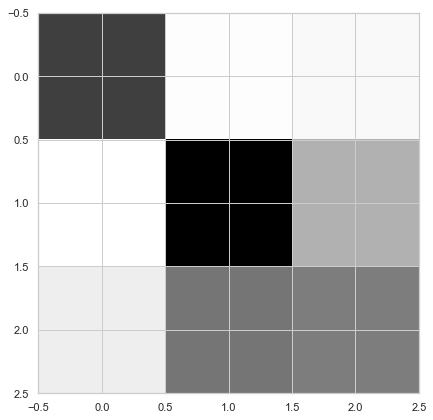

In [272]:
import matplotlib.pyplot as plt
import sklearn
conf = sklearn.metrics.confusion_matrix(y_true, y_pred)
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

In [287]:
# precision, recall, F1-score
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_true, y_pred, average='macro')

(0.6591250174697066, 0.6642160676574043, 0.6602176897989903, None)

In [273]:
# Feature importance

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

bclf = ExtraTreesClassifier(n_estimators=100)

bclf = bclf.fit(X_train, y_train)
  
model = SelectFromModel(bclf, prefit=True)

X_new = model.transform


In [274]:
bclf.feature_importances_

array([0.02920397, 0.00438226, 0.02591525, 0.0323706 , 0.02856923,
       0.01687586, 0.01776156, 0.01397194, 0.0131261 , 0.01344068,
       0.0202798 , 0.0190927 , 0.01737049, 0.01689768, 0.01660412,
       0.01627069, 0.03044483, 0.02185188, 0.02143602, 0.02358027,
       0.02086372, 0.03008051, 0.        , 0.        , 0.02906457,
       0.02439505, 0.02195961, 0.02076176, 0.02502584, 0.04619279,
       0.02559569, 0.02750413, 0.02095715, 0.02188665, 0.02264664,
       0.02834108, 0.01912792, 0.02047773, 0.01052424, 0.00654782,
       0.01541939, 0.02555083, 0.03029409, 0.03330264, 0.03195632,
       0.01719483, 0.00838487, 0.01649818])

In [276]:
# feature importance

feature_importances = pd.DataFrame(rfclf_m1.feature_importances_,
                                   index = X_features.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances.head()

,importance
fav_percent,0.060416
txavg_word,0.056293
descriptionv4,0.051262
fav_number,0.050871
fav_pop1000,0.033979


In [277]:
feature_importances['importance_rank'] = feature_importances['importance'].rank(ascending=True)

feature_importances

,importance,importance_rank
fav_percent,0.060416,48.0
txavg_word,0.056293,47.0
descriptionv4,0.051262,46.0
fav_number,0.050871,45.0
fav_pop1000,0.033979,44.0
descriptionv6,0.032975,43.0
dschar_count,0.031981,42.0
descriptionv3,0.031092,41.0
log_twcount,0.030532,40.0
txchar_count,0.029671,39.0


In [278]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
#seed = 7

In [279]:

model = SelectFromModel(rfclf_m1, prefit=True)

X_new = model.transform(X_train)

X_newtest = model.transform(X_test)               


In [280]:
X_new.shape

(11043, 24)

In [281]:
rfclf_m2 = RandomForestClassifier(random_state=0)
rfclf_m2.fit(X_new, y_train)

print("classifier accuracy:", rfclf_m2.score(X_newtest, y_test))  # score model

C:\Users\yasser\Anaconda2\envs\pyt36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



classifier accuracy: 0.6160811300253531


In [284]:
# model with XGBoost

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
#from sklearn import cross_validation, metrics   #Additional scklearn functions
#from sklearn.grid_search import GridSearchCV   #Perforing grid search

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [288]:
precision_recall_fscore_support(y_true, predictions, average='macro')

(0.6591250174697066, 0.6642160676574043, 0.6602176897989903, None)